In [2]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jasol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

df = pd.read_csv('top_shows_vid.csv')

df

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption
0,0,_dn4ApRcsb0,MoosePlays,EPIC PARKOUR CHALLENGE in Minecraft!,► SUBSCRIBE and SLAP THE 🔔 - http://bit.ly/Moo...,"['minecraft', 'mcpe', 'kids', 'kid', 'family',...",2022-10-28T16:00:27Z,3629.0,90.0,25.0,PT21S,hd,False
1,1,U--Uiz0Qz40,MoosePlays,NOOB vs PRO vs HACKER Speed Run TUTORIAL!,NOOB vs PRO vs HACKER Speed Run TUTORIAL! \n► ...,"['minecraft', 'mcpe', 'kids', 'kid', 'family',...",2022-10-24T16:30:07Z,1698.0,85.0,9.0,PT21S,hd,False
2,2,uwXDU9FMhkM,MoosePlays,HOW TO BREAK BEDROCK in MINECRAFT!,HOW TO BREAK BEDROCK in MINECRAFT!\n► SUBSCRIB...,"['minecraft', 'mcpe', 'kids', 'kid', 'family',...",2022-10-21T16:00:47Z,1137.0,86.0,9.0,PT48S,hd,False
3,3,LQsRB5QWnMM,MoosePlays,Minecraft Pixel Art,► SUBSCRIBE and SLAP THE 🔔 - http://bit.ly/Moo...,"['minecraft', 'mcpe', 'kids', 'kid', 'family',...",2021-09-07T16:00:11Z,16610.0,354.0,41.0,PT16S,hd,False
4,4,EGlOwHcUKUQ,MoosePlays,Minecraft best mlg clutch ever! (Gone Wrong),Minecraft best mlg clutch ever! (Gone Wrong)\n...,"['minecraft', 'mcpe', 'kids', 'kid', 'family',...",2021-09-06T12:45:00Z,7435.0,207.0,28.0,PT16S,hd,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7854,7854,X_c3SHj0qbc,kipkay,Underwater Camcorder Mod! $10!,Build a waterproof camcorder housing for about...,"['scuba', 'underwater', 'mod', 'camcorder', 'h...",2007-08-13T23:39:08Z,1181428.0,4984.0,1288.0,PT1M50S,sd,False
7855,7855,mnkjvEdeIlc,kipkay,$10 Police Flashlight Hack!,Make a $100 super bright cop Flashlight for le...,"['poliec', 'flashlight', 'hack', 'mod', 'kipkay']",2007-08-13T22:13:30Z,5736506.0,13741.0,2516.0,PT1M20S,sd,False
7856,7856,CgJ0EpxjZBU,kipkay,Amazing Lasers! - Laser Flashlight Hack!,MagLITE? What about MagLASER? Turn a Mini MagL...,"['make a laser', 'laser pointer', 'laser', 'bu...",2007-08-13T21:42:34Z,11888694.0,26048.0,7686.0,PT1M24S,sd,False
7857,7857,iSvQU2Is68s,kipkay,Rocket Powered Matchbox Cars!,Extreme rocket action! Watch them 'explode' in...,"['rocket', 'matchbox', 'exposion', 'cars', 'ki...",2007-08-12T19:08:28Z,4716835.0,8072.0,2240.0,PT1M7S,sd,False


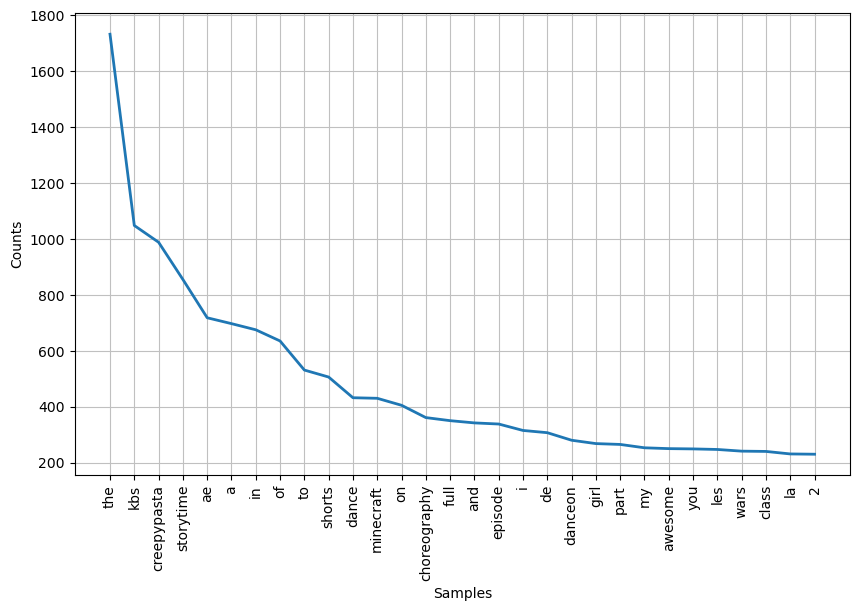

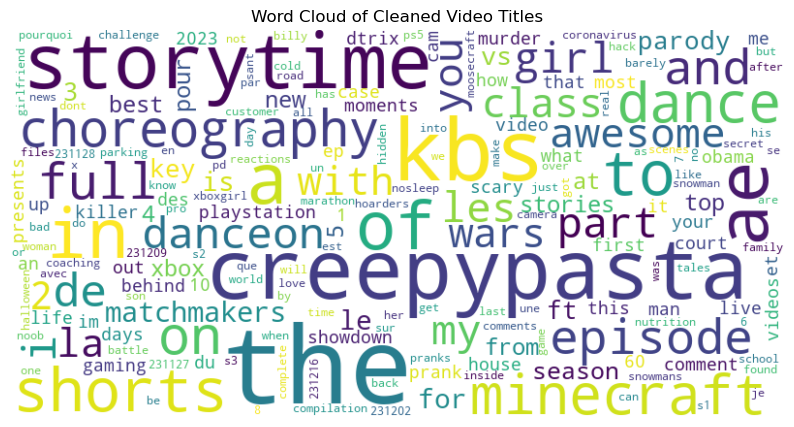

In [36]:
# Remove special characters from video titles
df['cleaned_titles'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: [word for word in word_tokenize(x.lower()) if len(word) > 3])

# Tokenize the cleaned video titles
df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: word_tokenize(x.lower()))

# Calculate word frequency distribution
all_words = [word for tokens in df['tokenized_titles'] for word in tokens]
fdist = FreqDist(all_words)

# Plot a bar chart of the most common words
plt.figure(figsize=(10, 6))
fdist.plot(30, cumulative=False)
plt.show()

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Video Titles')
plt.show()

In [5]:
df.shape

(7859, 15)

In [6]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jasol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Sample Tokenized Titles:
['epic', 'parkour', 'challenge', 'minecraft']
['noob', 'hacker', 'speed', 'tutorial']
['break', 'bedrock', 'minecraft']
['minecraft', 'pixel']
['minecraft', 'best', 'clutch', 'ever', 'gone', 'wrong']

Sample Cleaned Titles:
EPIC PARKOUR CHALLENGE in Minecraft
NOOB vs PRO vs HACKER Speed Run TUTORIAL
HOW TO BREAK BEDROCK in MINECRAFT
Minecraft Pixel Art
Minecraft best mlg clutch ever Gone Wrong


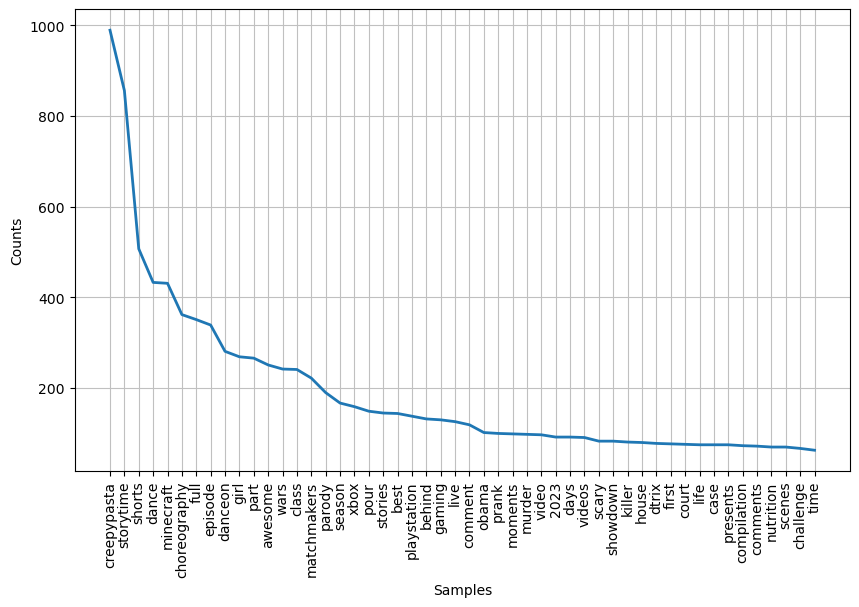

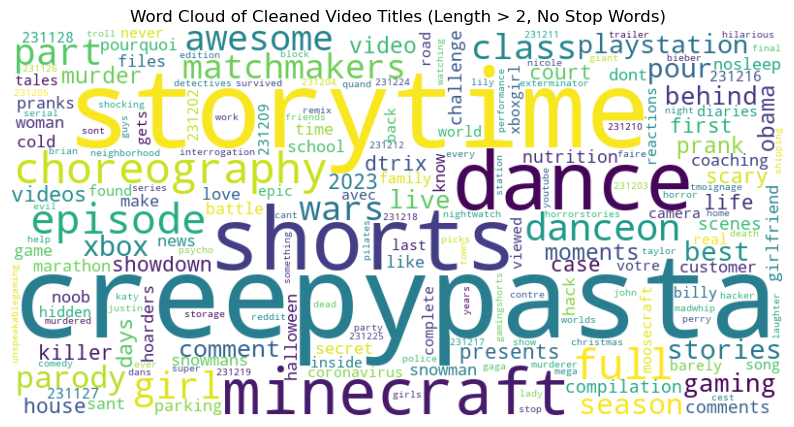

In [7]:
stop_words = set(stopwords.words('english'))
df['cleaned_titles'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: [word for word in word_tokenize(x.lower()) if len(word) > 3 and word not in stop_words])

# Calculate word frequency distribution
all_words = [word for tokens in df['tokenized_titles'] for word in tokens]
fdist = FreqDist(all_words)


# Print a sample of tokenized titles
print("Sample Tokenized Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['tokenized_titles'][i])

# Print a sample of cleaned titles
print("\nSample Cleaned Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['cleaned_titles'][i])
    
    
# Plot a bar chart of the most common words
plt.figure(figsize=(10, 6))
fdist.plot(50, cumulative=False)
plt.show()

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=150, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Video Titles (Length > 2, No Stop Words)')
plt.show()

In [8]:
from gensim import corpora, models

# Example: Topic Modeling with LDA
dictionary = corpora.Dictionary(df['tokenized_titles'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokenized_titles']]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.092*"creepypasta" + 0.080*"storytime" + 0.039*"dance" + 0.017*"stories" + 0.013*"choreography" + 0.009*"part" + 0.007*"pour" + 0.006*"school" + 0.005*"video" + 0.005*"nosleep"')
(1, '0.031*"minecraft" + 0.031*"shorts" + 0.020*"best" + 0.014*"videos" + 0.013*"prank" + 0.011*"wars" + 0.008*"compilation" + 0.008*"like" + 0.007*"girlfriend" + 0.007*"game"')
(2, '0.023*"matchmakers" + 0.023*"awesome" + 0.018*"shorts" + 0.018*"parody" + 0.013*"behind" + 0.007*"pranks" + 0.007*"scenes" + 0.007*"comments" + 0.005*"comedy" + 0.005*"231127"')
(3, '0.037*"danceon" + 0.035*"choreography" + 0.031*"class" + 0.030*"girl" + 0.021*"xbox" + 0.019*"playstation" + 0.013*"gaming" + 0.012*"season" + 0.011*"episode" + 0.011*"full"')
(4, '0.020*"dance" + 0.017*"episode" + 0.017*"full" + 0.014*"showdown" + 0.014*"dtrix" + 0.013*"presents" + 0.010*"first" + 0.007*"time" + 0.006*"wars" + 0.005*"back"')


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Sample Tokenized Titles:
['epic', 'parkour', 'challenge', 'minecraft']
['noob', 'pro', 'hacker', 'speed', 'run', 'tutorial']
['break', 'bedrock', 'minecraft']
['minecraft', 'pixel', 'art']
['minecraft', 'best', 'mlg', 'clutch', 'ever', 'gone', 'wrong']

Sample Cleaned Titles:
EPIC PARKOUR CHALLENGE in Minecraft
NOOB vs PRO vs HACKER Speed Run TUTORIAL
HOW TO BREAK BEDROCK in MINECRAFT
Minecraft Pixel Art
Minecraft best mlg clutch ever Gone Wrong
(0, '0.031*"creepypasta" + 0.027*"girl" + 0.024*"storytime" + 0.018*"shorts" + 0.017*"playstation" + 0.013*"dance" + 0.011*"gaming" + 0.011*"videos" + 0.010*"new" + 0.009*"best"')
(1, '0.030*"danceon" + 0.028*"class" + 0.026*"choreography" + 0.019*"episode" + 0.016*"full" + 0.014*"les" + 0.010*"showdown" + 0.010*"prank" + 0.008*"pour" + 0.007*"first"')
(2, '0.022*"creepypasta" + 0.021*"awesome" + 0.020*"stories" + 0.017*"storytime" + 0.016*"paro

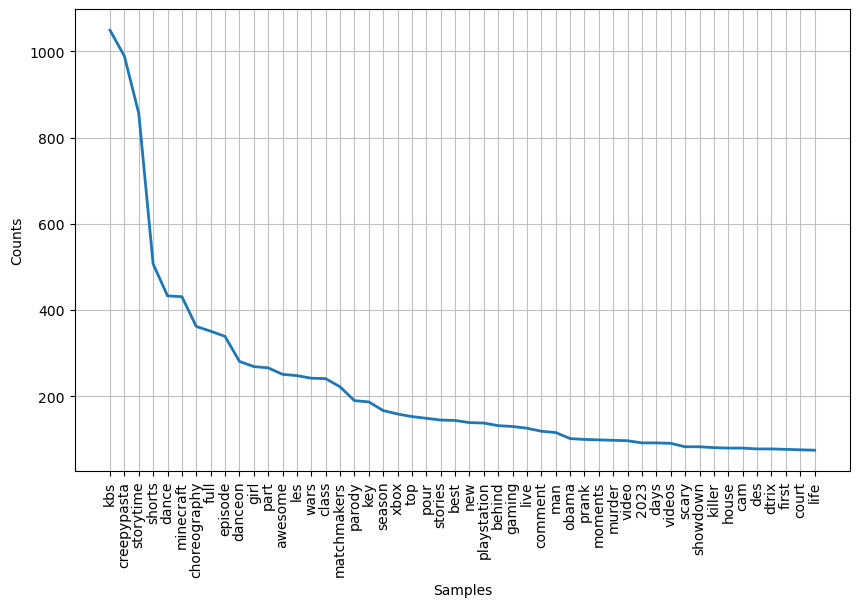

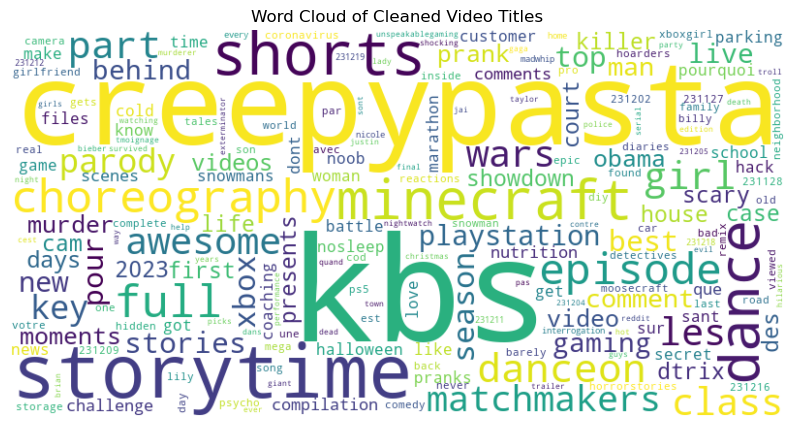

In [9]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy  # Add this import statement

# Download spaCy English language model
try:
    from spacy.cli import download
    download('en_core_web_sm')
except OSError:
    print("Model 'en_core_web_sm' already installed.")

# Remove special characters from video titles, filter out short words, and remove stop words
stop_words = set(stopwords.words('english'))
df['cleaned_titles'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: [word for word in word_tokenize(x.lower()) if len(word) > 2 and word not in stop_words])

# Calculate word frequency distribution
all_words = [word for tokens in df['tokenized_titles'] for word in tokens]
fdist = FreqDist(all_words)

# Print a sample of tokenized titles
print("Sample Tokenized Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['tokenized_titles'][i])

# Print a sample of cleaned titles
print("\nSample Cleaned Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['cleaned_titles'][i])
    
from gensim import corpora, models

# Example: Topic Modeling with LDA
dictionary = corpora.Dictionary(df['tokenized_titles'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokenized_titles']]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
for topic in lda_model.print_topics():
    print(topic)

# Plot a bar chart of the most common words
plt.figure(figsize=(10, 6))
fdist.plot(50, cumulative=False)
plt.show()

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=150, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Video Titles')
plt.show()


In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jasol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

df['pos_tags'] = df['tokenized_titles'].apply(lambda x: pos_tag(x))
print(df[['title', 'pos_tags']])

                                             title  \
0             EPIC PARKOUR CHALLENGE in Minecraft!   
1        NOOB vs PRO vs HACKER Speed Run TUTORIAL!   
2               HOW TO BREAK BEDROCK in MINECRAFT!   
3                              Minecraft Pixel Art   
4     Minecraft best mlg clutch ever! (Gone Wrong)   
...                                            ...   
7854                Underwater Camcorder Mod! $10!   
7855                   $10 Police Flashlight Hack!   
7856      Amazing Lasers! - Laser Flashlight Hack!   
7857                 Rocket Powered Matchbox Cars!   
7858          Infrared Goggle Hack For Under $10!!   

                                               pos_tags  
0     [(epic, RB), (parkour, JJ), (challenge, NN), (...  
1     [(noob, JJ), (pro, JJ), (hacker, NN), (speed, ...  
2         [(break, NN), (bedrock, NN), (minecraft, NN)]  
3           [(minecraft, NN), (pixel, NNS), (art, VBP)]  
4     [(minecraft, NN), (best, JJS), (mlg, NN), (clu...  
...

In [12]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Assuming you have a sentiment analysis library like TextBlob installed
from textblob import TextBlob

df['sentiment'] = df['tokenized_titles'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
print(df[['title', 'sentiment']])


                                             title  sentiment
0             EPIC PARKOUR CHALLENGE in Minecraft!       0.10
1        NOOB vs PRO vs HACKER Speed Run TUTORIAL!       0.00
2               HOW TO BREAK BEDROCK in MINECRAFT!       0.00
3                              Minecraft Pixel Art       0.00
4     Minecraft best mlg clutch ever! (Gone Wrong)       0.25
...                                            ...        ...
7854                Underwater Camcorder Mod! $10!       0.20
7855                   $10 Police Flashlight Hack!       0.00
7856      Amazing Lasers! - Laser Flashlight Hack!       0.60
7857                 Rocket Powered Matchbox Cars!       0.00
7858          Infrared Goggle Hack For Under $10!!       0.00

[7859 rows x 2 columns]


In [14]:
# Identify popular topics and keywords that resonate with the audience.
top_keywords = fdist.most_common(10)
print("Top Keywords:", top_keywords)

# Understand the overall sentiment of the titles and focus on creating content with a positive sentiment.
average_sentiment = df['sentiment'].mean()
print("Average Sentiment:", average_sentiment)

# Analyze the distribution of text lengths and consider diversifying content lengths to cater to different preferences.
text_lengths = df['tokenized_titles'].apply(len)
print("Mean Text Length:", text_lengths.mean())


Top Keywords: [('kbs', 1049), ('creepypasta', 989), ('storytime', 856), ('shorts', 507), ('dance', 433), ('minecraft', 431), ('choreography', 362), ('full', 351), ('episode', 339), ('danceon', 281)]
Average Sentiment: 0.030163926256383894
Mean Text Length: 5.690545870975951


In [15]:
from nltk import FreqDist
from nltk import bigrams

# Assuming df is your DataFrame with a 'tokenized_titles' column
all_bigrams = [bigram for tokens in df['tokenized_titles'] for bigram in bigrams(tokens)]
bigram_freq = FreqDist(all_bigrams)

# Print or visualize the results
print(bigram_freq.most_common(10))

[(('creepypasta', 'storytime'), 832), (('full', 'episode'), 276), (('matchmakers', 'kbs'), 222), (('choreography', 'danceon'), 206), (('danceon', 'class'), 203), (('key', 'awesome'), 180), (('playstation', 'girl'), 106), (('part', 'creepypasta'), 92), (('dance', 'videos'), 82), (('choreography', 'dance'), 81)]


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming df is your DataFrame with a 'tokenized_titles' column
tokenized_titles = [' '.join(tokens) for tokens in df['tokenized_titles']]

# Convert tokenized titles to a document-term matrix
vectorizer = CountVectorizer(max_df=0.85, max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(tokenized_titles)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust the number of topics as needed
lda_topic_matrix = lda_model.fit_transform(dtm)

# Print or visualize the results
lda_topic_matrix

array([[0.48112404, 0.04018034, 0.0402057 , 0.04000047, 0.39848945],
       [0.69053855, 0.03376462, 0.20902791, 0.03333432, 0.0333346 ],
       [0.73036959, 0.06666785, 0.06666764, 0.06962676, 0.06666817],
       ...,
       [0.03467168, 0.69857421, 0.03333413, 0.03333424, 0.20008575],
       [0.59999205, 0.10000206, 0.10000165, 0.10000183, 0.10000241],
       [0.10000033, 0.10000029, 0.10000024, 0.10000028, 0.59999886]])

In [17]:
# Assuming lda_topic_matrix is your LDA topic matrix
df['dominant_topic'] = lda_topic_matrix.argmax(axis=1) + 1  # Adding 1 to make topics start from 1

# Print or visualize the results
print(df[['title', 'dominant_topic']])


                                             title  dominant_topic
0             EPIC PARKOUR CHALLENGE in Minecraft!               1
1        NOOB vs PRO vs HACKER Speed Run TUTORIAL!               1
2               HOW TO BREAK BEDROCK in MINECRAFT!               1
3                              Minecraft Pixel Art               1
4     Minecraft best mlg clutch ever! (Gone Wrong)               1
...                                            ...             ...
7854                Underwater Camcorder Mod! $10!               1
7855                   $10 Police Flashlight Hack!               1
7856      Amazing Lasers! - Laser Flashlight Hack!               2
7857                 Rocket Powered Matchbox Cars!               1
7858          Infrared Goggle Hack For Under $10!!               5

[7859 rows x 2 columns]


In [18]:
# Assuming vectorizer is the CountVectorizer used for LDA
feature_names = vectorizer.get_feature_names_out()

# Print the top keywords for each topic
n_top_keywords = 10
for i, topic in enumerate(lda_model.components_):
    top_keywords_idx = topic.argsort()[:-n_top_keywords-1:-1]
    top_keywords = [feature_names[idx] for idx in top_keywords_idx]
    print(f'Topic {i+1}: {top_keywords}')


Topic 1: ['minecraft', 'awesome', 'parody', 'key', 'live', 'season', 'scenes', 'coaching', 'episode', 'house']
Topic 2: ['creepypasta', 'storytime', 'episode', 'obama', 'man', 'scary', 'girl', 'killer', 'murder', 'compilation']
Topic 3: ['storytime', 'creepypasta', 'dance', 'choreography', 'danceon', 'class', 'best', 'stories', 'videos', 'episode']
Topic 4: ['les', 'wars', 'girl', 'shorts', 'xbox', 'pour', 'playstation', 'gaming', 'comment', 'des']
Topic 5: ['kbs', 'shorts', 'matchmakers', 'moments', '2023', 'cam', 'court', 'days', 'new', 'prank']


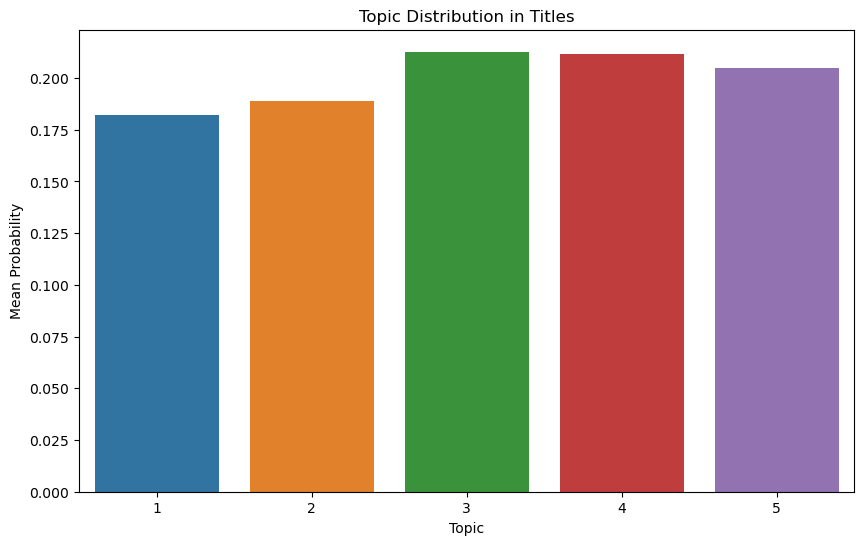

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming lda_topic_matrix is your LDA topic matrix
topic_distribution = lda_topic_matrix.mean(axis=0)

# Plot the distribution of topics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(topic_distribution)+1)), y=topic_distribution)
plt.title('Topic Distribution in Titles')
plt.xlabel('Topic')
plt.ylabel('Mean Probability')
plt.show()

In [20]:
# Assuming vectorizer is your CountVectorizer used for LDA
feature_names = vectorizer.get_feature_names_out()

# Print top keywords for each topic
n_top_keywords = 10
for topic_idx, topic in enumerate(lda_model.components_):
    top_keywords_idx = topic.argsort()[:-n_top_keywords - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_keywords)}")


Topic 1: minecraft, awesome, parody, key, live, season, scenes, coaching, episode, house
Topic 2: creepypasta, storytime, episode, obama, man, scary, girl, killer, murder, compilation
Topic 3: storytime, creepypasta, dance, choreography, danceon, class, best, stories, videos, episode
Topic 4: les, wars, girl, shorts, xbox, pour, playstation, gaming, comment, des
Topic 5: kbs, shorts, matchmakers, moments, 2023, cam, court, days, new, prank


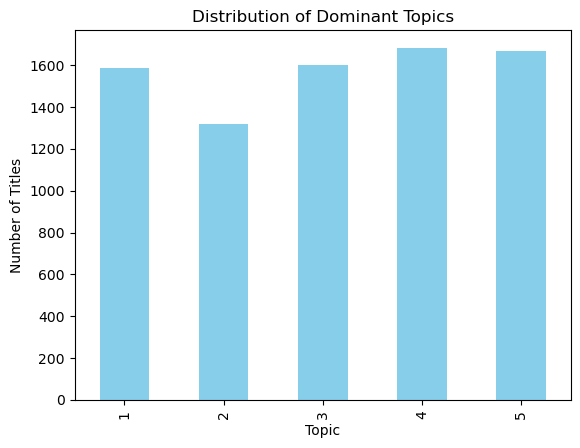

In [21]:
import matplotlib.pyplot as plt

topic_distribution = df['dominant_topic'].value_counts().sort_index()
topic_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Dominant Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Titles')
plt.show()

In [22]:
# Assuming df is your DataFrame
for topic_idx in range(1, lda_model.n_components + 1):
    topic_titles = df[df['dominant_topic'] == topic_idx]['title'].tolist()
    print(f"\nTitles for Dominant Topic {topic_idx}:\n")
    for title in topic_titles:
        print(title)



Titles for Dominant Topic 1:

EPIC PARKOUR CHALLENGE in Minecraft!
NOOB vs PRO vs HACKER Speed Run TUTORIAL!
HOW TO BREAK BEDROCK in MINECRAFT!
Minecraft Pixel Art
Minecraft best mlg clutch ever! (Gone Wrong)
Minecraft Sand Cannon
Making AMONG US SHEEP in MINECRAFT!
minecraft hack lol
Mushroom + Rabbit = ????
My EX GIRL FRIEND or NOOB FRIEND in MINECRAFT?
Among Us Pixel Art in Minecraft!
Noob vs Pro vs Hacker
Iron golem Mining for Diamonds!
NOOB vs PRO vs HACKER DREAM BOAT CUTCH MLG CHALLENGE!
Minecraft Loop 50%
What happens next might scare you..
Funny Minecraft Mining Competition
TNT under da sea Experiment in Minecraft!
Block glitch in minecraft lol
Minecraft Shaders 30%
Destroying the NETHER... and my NASA PC! Minecraft Meme
villager + pig = ???
I should of never saved a creeper in minecraft..
Did the EGG Or CHICKEN Come FIRST?
"Minecrafters" - A Minecraft Parody of Castaways by Backyardigan's (MEME Music Video)
SMALLEST MINECRAFT PIXEL ART Every....
The smallest object ever in mi

Mean Title Length (Characters): 56.88497264282988
Median Title Length (Characters): 57.0
Minimum Title Length (Characters): 7
Maximum Title Length (Characters): 100


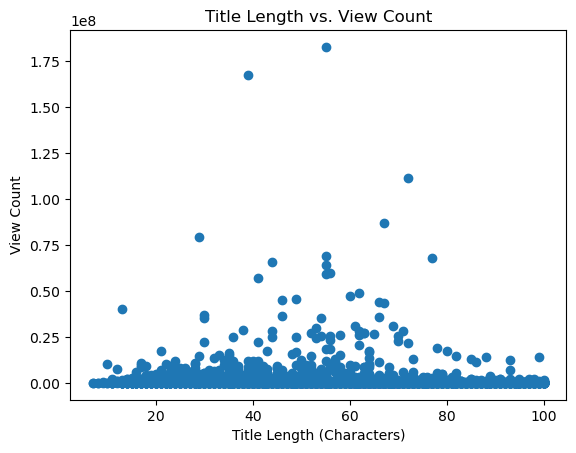

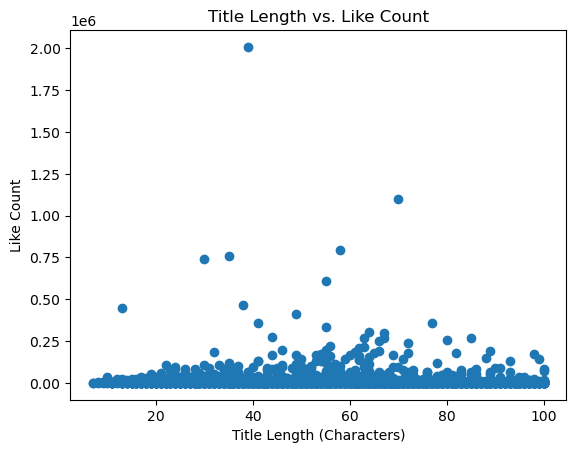

Correlation between Title Length and View Count: -0.055593354766288704
Correlation between Title Length and Like Count: -0.03991398732430422


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'title', 'viewcount', and 'likecount' are the column names in your DataFrame
# Calculate title length in characters
df['title_length_characters'] = df['title'].apply(len)

# Descriptive statistics for title length
print("Mean Title Length (Characters):", df['title_length_characters'].mean())
print("Median Title Length (Characters):", df['title_length_characters'].median())
print("Minimum Title Length (Characters):", df['title_length_characters'].min())
print("Maximum Title Length (Characters):", df['title_length_characters'].max())

# Scatter plot: Title length vs. View count
plt.scatter(df['title_length_characters'], df['viewCount'])
plt.title('Title Length vs. View Count')
plt.xlabel('Title Length (Characters)')
plt.ylabel('View Count')
plt.show()

# Scatter plot: Title length vs. Like count
plt.scatter(df['title_length_characters'], df['likeCount'])
plt.title('Title Length vs. Like Count')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Like Count')
plt.show()

# Correlation analysis between title length, view count, and like count
correlation_viewcount = df['title_length_characters'].corr(df['viewCount'])
correlation_likecount = df['title_length_characters'].corr(df['likeCount'])

print("Correlation between Title Length and View Count:", correlation_viewcount)
print("Correlation between Title Length and Like Count:", correlation_likecount)


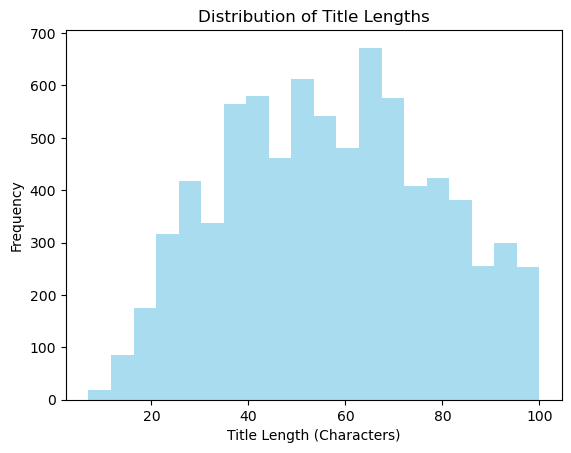

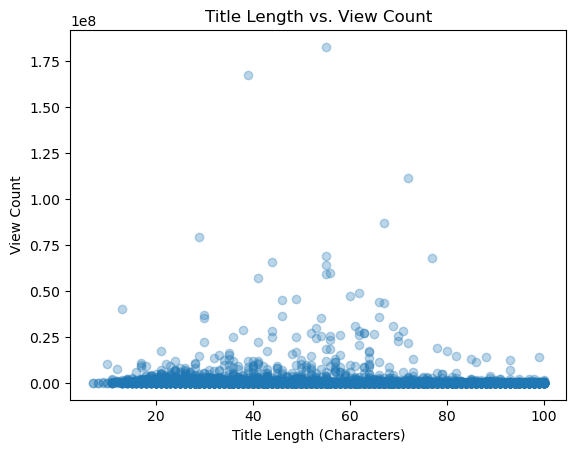

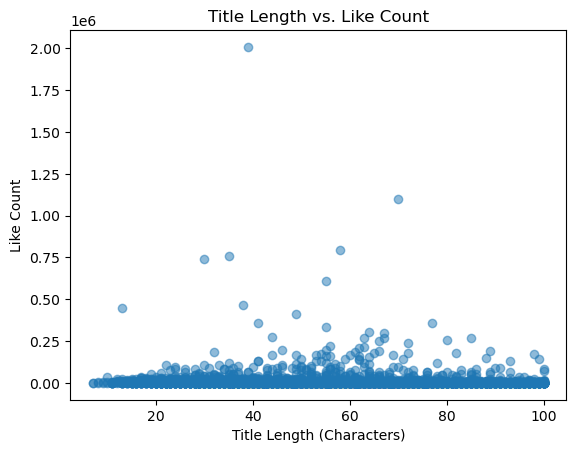

In [31]:
# Histogram: Title length distribution
plt.hist(df['title_length_characters'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Title length vs. View count
plt.scatter(df['title_length_characters'], df['viewCount'], alpha=0.3)
plt.title('Title Length vs. View Count')
plt.xlabel('Title Length (Characters)')
plt.ylabel('View Count')
plt.show()

# Scatter plot: Title length vs. Like count
plt.scatter(df['title_length_characters'], df['likeCount'], alpha=0.5)
plt.title('Title Length vs. Like Count')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Like Count')
plt.show()

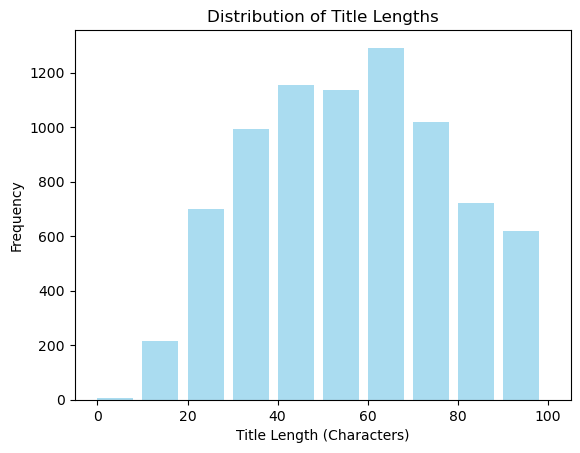

In [29]:
# Define intervals and width for the histogram
interval_bins = range(0, max(df['title_length_characters']) + 10, 10)
bar_width = 8  # Adjust the width as needed

# Histogram: Title length distribution with intervals and space between bars
plt.hist(df['title_length_characters'], bins=interval_bins, color='skyblue', alpha=0.7, width=bar_width)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Frequency')
plt.show()

1458
1755
4646


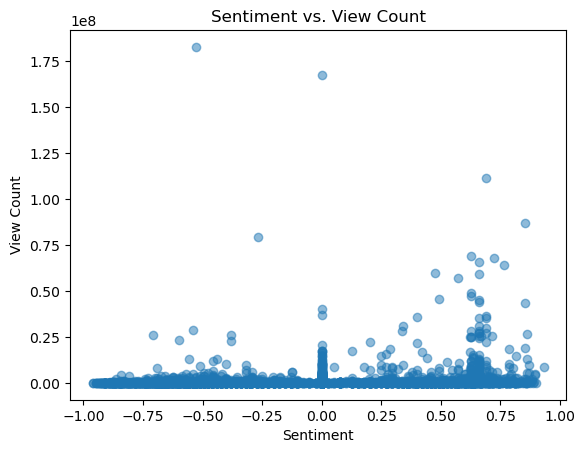

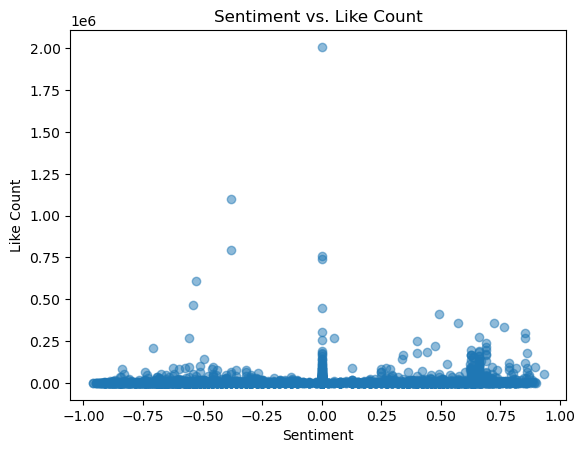

In [43]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'title', 'viewcount', 'likecount'
df['title'] = df['title'].astype(str)

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each title and create a new column
df['sentiment'] = df['title'].apply(lambda title: sid.polarity_scores(title)['compound'])

df['sentiment_category'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Count the number of titles in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

print(sentiment_counts['positive'])
print(sentiment_counts['negative'])
print(sentiment_counts['neutral'])

# Scatter plot: Sentiment vs. View count
plt.scatter(df['sentiment'], df['viewCount'], alpha=0.5)
plt.title('Sentiment vs. View Count')
plt.xlabel('Sentiment')
plt.ylabel('View Count')
plt.show()

# Scatter plot: Sentiment vs. Like count
plt.scatter(df['sentiment'], df['likeCount'], alpha=0.5)
plt.title('Sentiment vs. Like Count')
plt.xlabel('Sentiment')
plt.ylabel('Like Count')
plt.show()


In [44]:
pip install textstat

     -------------------------------------- 105.1/105.1 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


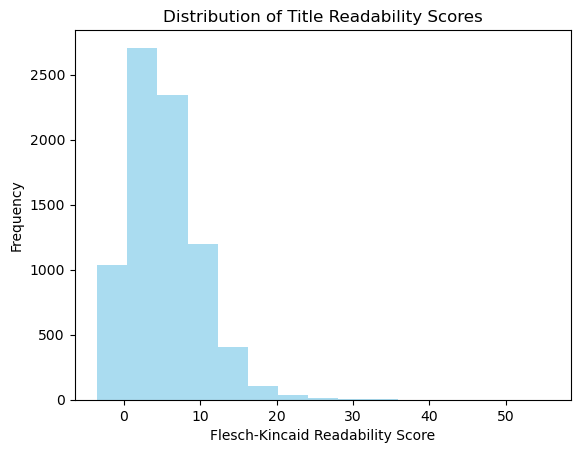

In [53]:
import pandas as pd
import textstat

# Assuming you have a DataFrame named 'df' with a 'title' column
df['title'] = df['title'].astype(str)

# Calculate Flesch-Kincaid readability score for each title
df['readability_score'] = df['title'].apply(lambda title: textstat.flesch_kincaid_grade(title))

# Visualize the distribution of readability scores
import matplotlib.pyplot as plt
plt.hist(df['readability_score'], bins=15, color='skyblue', alpha=0.7)
plt.title('Distribution of Title Readability Scores')
plt.xlabel('Flesch-Kincaid Readability Score')
plt.ylabel('Frequency')
plt.show()

In [46]:
pip install pyphen

Note: you may need to restart the kernel to use updated packages.


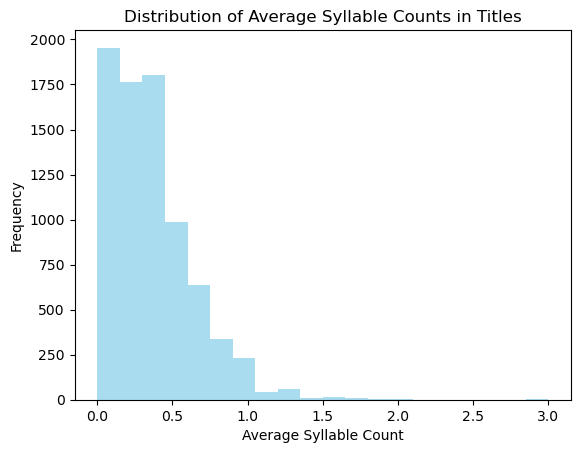

In [47]:
import pandas as pd
import pyphen

# Assuming you have a DataFrame named 'df' with a 'title' column
df['title'] = df['title'].astype(str)

# Create a syllable counter
dic = pyphen.Pyphen(lang='en')

# Calculate average syllable count for each title
df['avg_syllable_count'] = df['title'].apply(lambda title: sum(len(dic.positions(w)) for w in title.split()) / len(title.split()))

# Visualize the distribution of average syllable counts
import matplotlib.pyplot as plt
plt.hist(df['avg_syllable_count'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Average Syllable Counts in Titles')
plt.xlabel('Average Syllable Count')
plt.ylabel('Frequency')
plt.show()


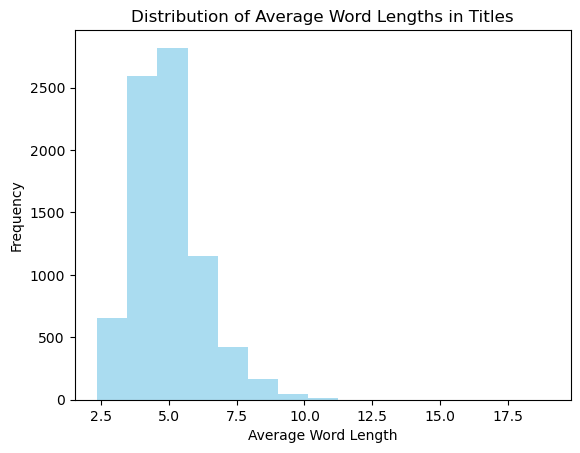

In [52]:
# Calculate average word length for each title
df['avg_word_length'] = df['title'].apply(lambda title: sum(len(word) for word in title.split()) / len(title.split()))

# Visualize the distribution of average word lengths
plt.hist(df['avg_word_length'], bins=15, color='skyblue', alpha=0.7)
plt.title('Distribution of Average Word Lengths in Titles')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()

In [50]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


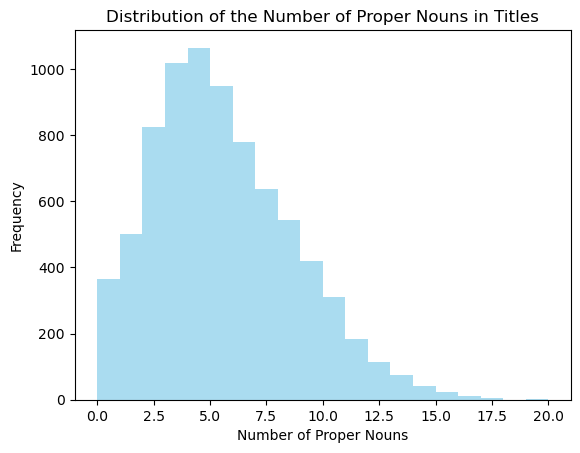

In [51]:
import spacy

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Define a function to count the number of proper nouns in a title
def count_proper_nouns(title):
    doc = nlp(title)
    return len([token.text for token in doc if token.pos_ == 'PROPN'])

# Calculate the number of proper nouns for each title
df['num_proper_nouns'] = df['title'].apply(count_proper_nouns)

# Visualize the distribution of the number of proper nouns
plt.hist(df['num_proper_nouns'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of the Number of Proper Nouns in Titles')
plt.xlabel('Number of Proper Nouns')
plt.ylabel('Frequency')
plt.show()


In [54]:
import pandas as pd
import spacy
from collections import Counter

# Assuming you have a DataFrame named 'df' with a 'title' column
df['title'] = df['title'].astype(str)

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Function to extract proper nouns from a title
def extract_proper_nouns(title):
    doc = nlp(title)
    proper_nouns = [token.text for token in doc if token.pos_ == 'PROPN']
    return proper_nouns

# Apply the function to each title and create a new column
df['proper_nouns'] = df['title'].apply(extract_proper_nouns)

# Flatten the list of proper nouns and count occurrences
all_proper_nouns = [noun for nouns in df['proper_nouns'] for noun in nouns]
proper_noun_counts = Counter(all_proper_nouns)

# Display the most common proper nouns
print("Top 10 Most Common Proper Nouns:")
for noun, count in proper_noun_counts.most_common(10):
    print(f"{noun}: {count}")


Top 10 Most Common Proper Nouns:
KBS: 1048
|: 991
Creepypasta: 847
Storytime: 842
A&E: 724
방송: 542
Dance: 412
Choreography: 361
DanceOn: 258
Girl: 256


In [55]:
import pandas as pd
import spacy
from collections import Counter

# Assuming you have a DataFrame named 'df' with a 'title' column
df['title'] = df['title'].astype(str)

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Function to extract proper nouns from a title
def extract_proper_nouns(title):
    doc = nlp(title)
    proper_nouns = [token.text for token in doc if token.pos_ == 'PROPN']
    return proper_nouns

# Apply the function to each title and create a new column
df['proper_nouns'] = df['title'].apply(extract_proper_nouns)

# Flatten the list of proper nouns and count occurrences
all_proper_nouns = [noun for nouns in df['proper_nouns'] for noun in nouns]
proper_noun_counts = Counter(all_proper_nouns)

# Display the most common proper nouns and associated titles
print("Top 10 Most Common Proper Nouns:")
for noun, count in proper_noun_counts.most_common(10):
    print(f"{noun}: {count}")
    titles_with_noun = df[df['proper_nouns'].apply(lambda nouns: noun in nouns)]['title'].tolist()
    print("Titles:")
    for title in titles_with_noun:
        print(f"  - {title}")
    print()


Top 10 Most Common Proper Nouns:
KBS: 1048
Titles:
  - [70회 예고] 내가 당할 것 같아? 꿈도 꾸지 마 [우당탕탕 패밀리] | KBS 방송
  - [88회 예고] 아버님을 구해, 장기윤은 내가 맡을 테니 [우아한 제국] | KBS 방송
  - 오디션 시작 전 화장실에 갇혀버린 남상지  [우당탕탕 패밀리] | KBS 231226 방송
  - ＂포기하지 않았습니다!＂ 오디션 장에 도착한 남상지?! [우당탕탕 패밀리] | KBS 231226 방송
  - 안연홍은 이대연을 만나 돈을 빌려 달라고 부탁한다  [우당탕탕 패밀리] | KBS 231226 방송
  - 임나영은 임하룡과 김보미를 만나 설득을 한다  [우당탕탕 패밀리] | KBS 231226 방송
  - ＂인사? 그게 인사야?＂남상지를 보고 흔들리는 채서경?! [우당탕탕 패밀리] | KBS 231226 방송
  - 남상지가 오디션에 참가하지 못하게 방해하는 오채이?! [우당탕탕 패밀리] | KBS 231226 방송
  - ＂신경쓰여?＂남상지에게 윙크를 날리는 채서경 [우당탕탕 패밀리] | KBS 231226 방송
  - 주새벽은 가족들에게 동생들을 만나보겠다고 얘기한다 [우당탕탕 패밀리] | KBS 231226 방송
  - 결국 이시강을 만나는 방형주! 그의 뒤를 밟은...강율? 결국 쓰러지고 마는데! [우아한 제국] | KBS 231226 방송
  - 이제는 남경읍의 식사마저 주지 않는 김서라! 그러나 손성윤의 친절 [우아한 제국] | KBS 231226 방송
  - 이시강의 말에 넘어가기 직전의 한지완, 딸을 위해 다시금 고통을 감내하려하는데 [우아한 제국] | KBS 231226 방송
  - 단단한 멘탈로 당당하게 출근한 김솔비, 그녀를 대놓고 해고시키는 이시강 [우아한 제국] | KBS 231226 방송
  - 무너진 방형주와 남겨진 이미영과 김솔비! 두 사람이 꿋꿋하게 살아가는 방법 [우아한 제국] | KBS 231226 방송
  - 실어증이 고쳐진 수아,

In [58]:
import pandas as pd
import spacy

# Assuming you have a DataFrame named 'df' with 'title' and 'channel_name' columns
# Make sure to replace 'channel_name' with the actual column name in your DataFrame

df['title'] = df['title'].astype(str)

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Function to extract proper nouns from a title
def extract_proper_nouns(title):
    doc = nlp(title)
    proper_nouns = [token.text for token in doc if token.pos_ == 'PROPN']
    return proper_nouns

# Apply the function to each title and create a new column
df['proper_nouns'] = df['title'].apply(extract_proper_nouns)

# Flatten the list of proper nouns and count occurrences
all_proper_nouns = [noun for nouns in df['proper_nouns'] for noun in nouns]
proper_noun_counts = pd.DataFrame.from_dict(Counter(all_proper_nouns), orient='index', columns=['count'])

# Display the most common proper nouns with counts
# print("Top 10 Most Common Proper Nouns:")
# print(proper_noun_counts.sort_values(by='count', ascending=False).head(10))

# Store titles and channel names with proper nouns in a new DataFrame
titles_with_proper_nouns_df = df[['title', 'channelTitle', 'proper_nouns']]

# Display the new DataFrame
#print("\nTitles with Channel Names and Proper Nouns:")
print(titles_with_proper_nouns_df.head())



Titles with Channel Names and Proper Nouns:
                                          title channelTitle  \
0          EPIC PARKOUR CHALLENGE in Minecraft!   MoosePlays   
1     NOOB vs PRO vs HACKER Speed Run TUTORIAL!   MoosePlays   
2            HOW TO BREAK BEDROCK in MINECRAFT!   MoosePlays   
3                           Minecraft Pixel Art   MoosePlays   
4  Minecraft best mlg clutch ever! (Gone Wrong)   MoosePlays   

                                proper_nouns  
0      [EPIC, PARKOUR, CHALLENGE, Minecraft]  
1  [NOOB, PRO, HACKER, Speed, Run, TUTORIAL]  
2                       [BEDROCK, MINECRAFT]  
3                    [Minecraft, Pixel, Art]  
4                                [Minecraft]  


1458
1755
4646


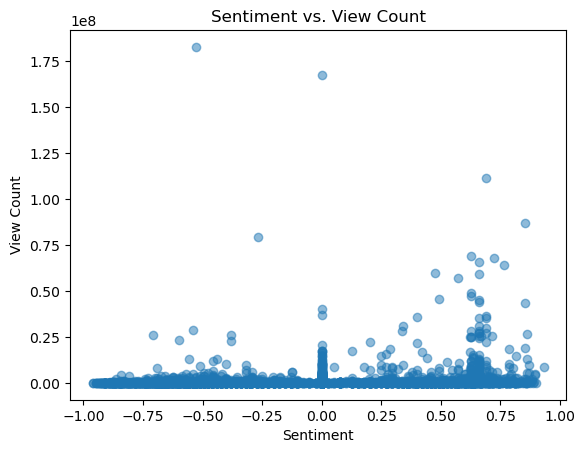

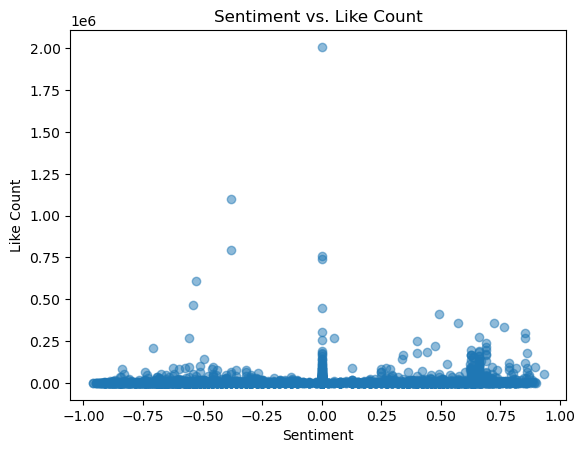

In [60]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'title', 'viewcount', 'likecount'
df['title'] = df['title'].astype(str)

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each title and create a new column
df['sentiment'] = df['title'].apply(lambda title: sid.polarity_scores(title)['compound'])

df['sentiment_category'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Count the number of titles in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

print(sentiment_counts['positive'])
print(sentiment_counts['negative'])
print(sentiment_counts['neutral'])

# Scatter plot: Sentiment vs. View count
plt.scatter(df['sentiment'], df['viewCount'], alpha=0.5)
plt.title('Sentiment vs. View Count')
plt.xlabel('Sentiment')
plt.ylabel('View Count')
plt.show()

# Scatter plot: Sentiment vs. Like count
plt.scatter(df['sentiment'], df['likeCount'], alpha=0.5)
plt.title('Sentiment vs. Like Count')
plt.xlabel('Sentiment')
plt.ylabel('Like Count')
plt.show()

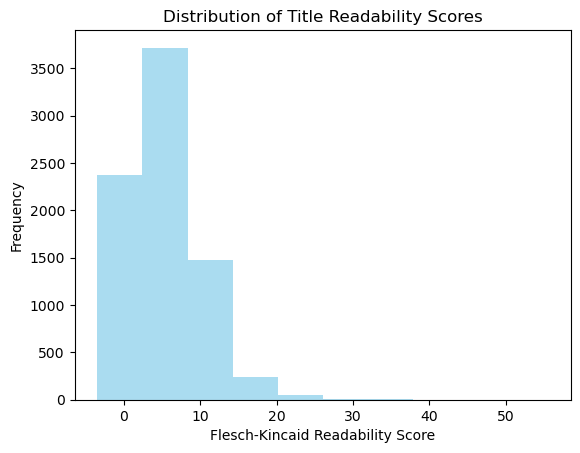

In [59]:
import pandas as pd
import textstat

# Assuming you have a DataFrame named 'df' with a 'title' column
df['title'] = df['title'].astype(str)

# Calculate Flesch-Kincaid readability score for each title
df['readability_score'] = df['title'].apply(lambda title: textstat.flesch_kincaid_grade(title))

# Visualize the distribution of readability scores
import matplotlib.pyplot as plt
plt.hist(df['readability_score'], bins=10, color='skyblue', alpha=0.7)
plt.title('Distribution of Title Readability Scores')
plt.xlabel('Flesch-Kincaid Readability Score')
plt.ylabel('Frequency')
plt.show()